Dataset Information

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


EDA

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
print(df['TotalCharges'].isnull().sum())

11


In [11]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [13]:
#Check class balance
import seaborn as sns
import matplotlib.pyplot as plt

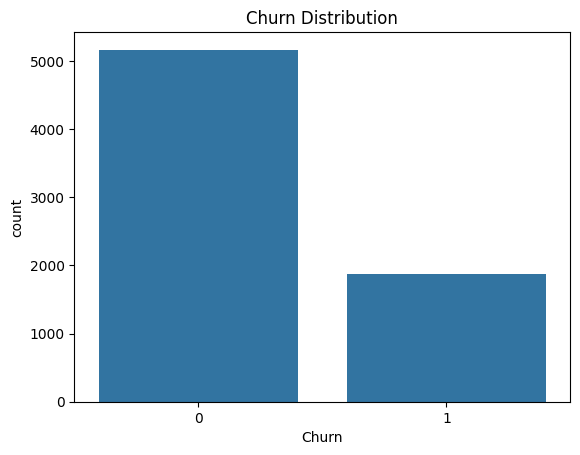

In [14]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

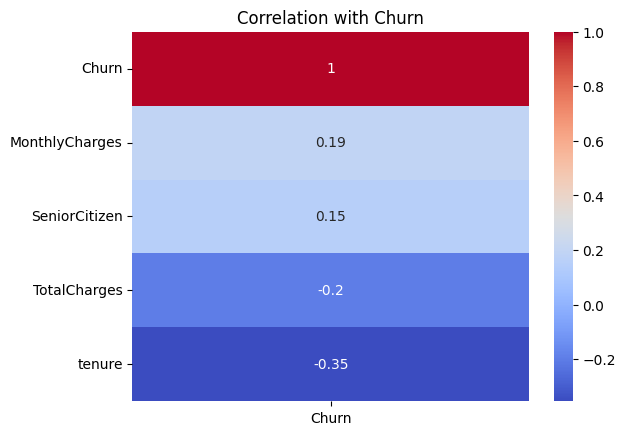

In [15]:
#correlation with churn
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Churn']].sort_values(by='Churn',ascending=False), annot=True, cmap = 'coolwarm')
plt.title("Correlation with Churn")
plt.show()

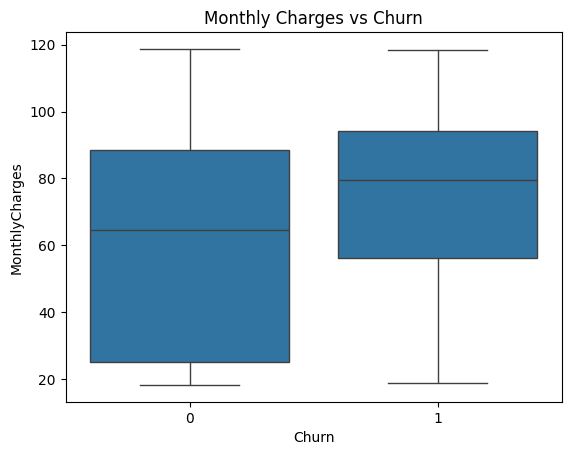

In [16]:
#boxplot of monthlycharges vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Preprocessing

In [17]:
df.drop(['customerID'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [19]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)

Modeling

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\Nikhil Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression:
Accuracy: 0.7960199004975125
[[907 126]
 [161 213]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [26]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.783226723525231
[[921 112]
 [193 181]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Evaluation

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [28]:
# Logistic Regression
y_probs_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)

In [29]:
# Random Forest
y_probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

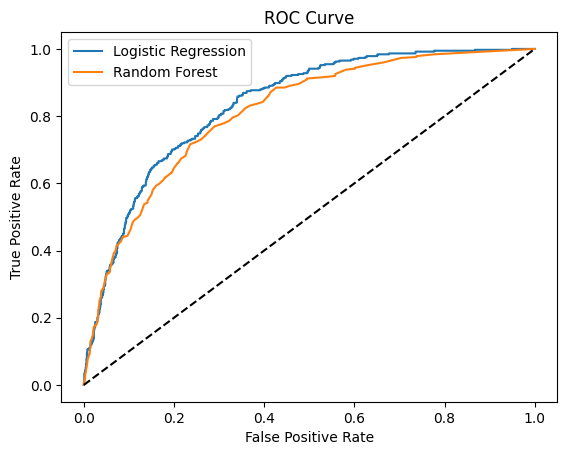

In [30]:
# Plot
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [31]:
# AUC scores
print("AUC - Logistic Regression:", roc_auc_score(y_test, y_probs_lr))
print("AUC - Random Forest:", roc_auc_score(y_test, y_probs_rf))

AUC - Logistic Regression: 0.834608973396628
AUC - Random Forest: 0.8113316698676303


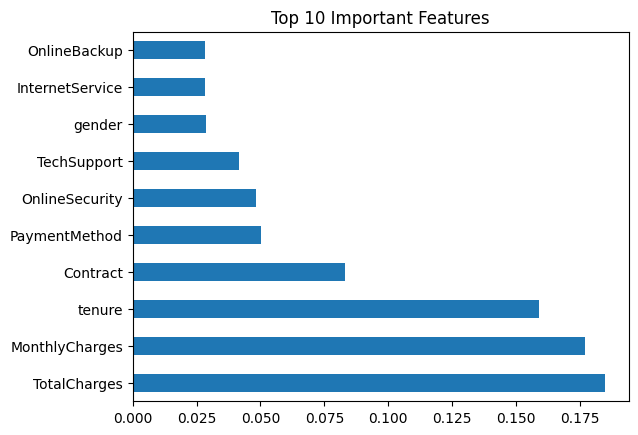

In [33]:
#Feature importance
import pandas as pd
import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()